1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Probability of getting at least 15 hurricanes in a year: 0.002217122790073134
pvalue: 0.0026997960632601965
pvalue (obtained by integrating) 0.0026997960632601965


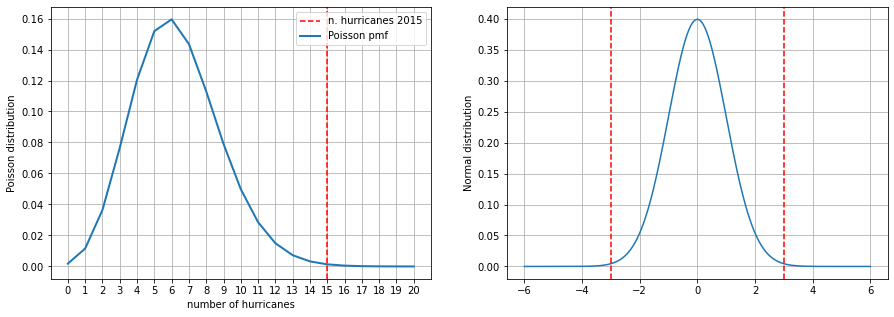

In [1]:
from scipy import stats
from math import ceil
import numpy as np
import matplotlib.pyplot as plt

n_hurr = 15
param = 6.3   #this is also the mean of the poisson distribution
m = param

x = np.arange(0, 21, 1)
y = stats.poisson.pmf(x, mu=param)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.set_xticks(x)
ax.axvline(n_hurr, linestyle='dashed', c='red', label='n. hurricanes 2015')
ax.grid()
ax.plot(x, y, label='Poisson pmf', lw=2)
ax.set_xlabel('number of hurricanes')
ax.set_ylabel('Poisson distribution')
ax.legend()

prob = 1 - stats.poisson.cdf(14, param)
print("Probability of getting at least 15 hurricanes in a year:", prob)

Z = 3
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("pvalue:", pvalue)
x2 = np.linspace(-6,6,1000)
y2 = stats.norm.pdf(x2)
ax = fig.add_subplot(1,2,2)
ax.plot(x2, y2)
ax.axvline(Z, linestyle='dashed', c='red')
ax.axvline(-Z, linestyle='dashed', c='red')
ax.set_ylabel('Normal distribution')
ax.grid()

#The problem is two tailed, because the number of hurricanes can be either larger or smaller than the mean value
Z = 3
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("pvalue (obtained by integrating)", pvalue)

#so the value we obtained (prob) is statistically significant

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T: -3.786997938137629


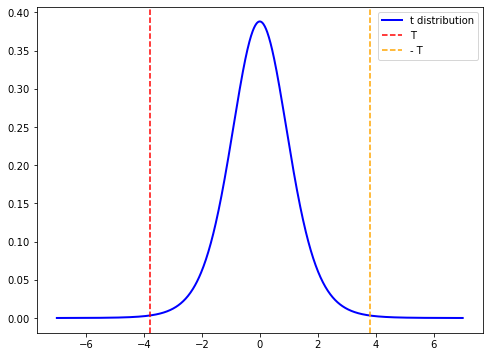

pvalue: 0.004302464132864604
The pvalue is lower than alfa/2, that is equal to 0.025 (if we choose alfa equal to 0.5)
We can conclude that the change in blood pressure is statistically significant


In [2]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre)
x_bar_1 = np.mean(pre)
x_bar_2 = np.mean(post)

var_1 = np.var(pre, ddof=1)
var_2 = np.var(post, ddof=1)
sigma = np.sqrt((var_1 + var_2)/2)

T = (x_bar_1 - x_bar_2)/(sigma*np.sqrt(2/n))
print("T:", T)

fig, ax = plt.subplots(figsize=(8,6))
x = np.linspace(-7, 7, 1000)
y = stats.t.pdf(x, n-1)
ax.plot(x,y, c='blue', label='t distribution', lw=2)
ax.axvline(T, ls='dashed', c='red', label='T')
ax.axvline(-T, ls='dashed', c='orange', label='- T')
ax.legend()
plt.show()

#once again, the problem is two-sides
pvalue = stats.t.cdf(T, n-1) + (1 - stats.t.cdf(-T, n-1))
print("pvalue:", pvalue)
print("The pvalue is lower than alfa/2, that is equal to 0.025 (if we choose alfa equal to 0.5)")
print("We can conclude that the change in blood pressure is statistically significant")

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.


Peak frequency for lynxes: 0.09523809523809523
Peak frequency for hares: 0.09523809523809523

Peridiocity of lynxes: 10.5 years
Peridiocity of hares: 10.5 years



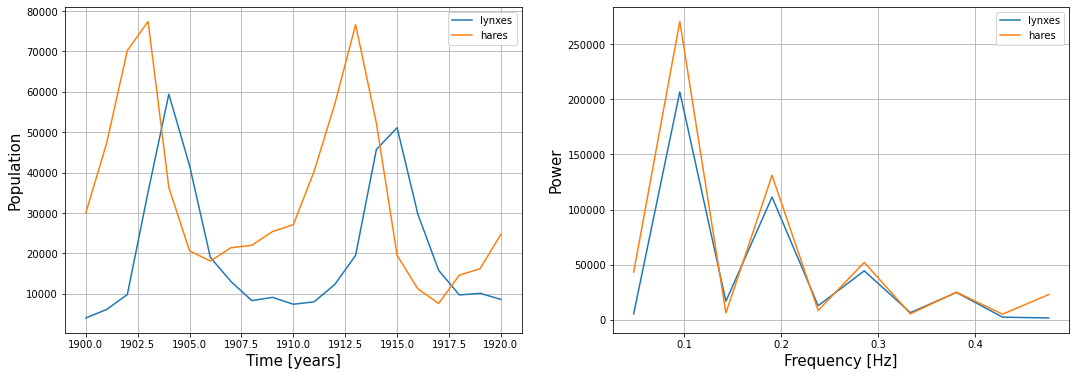

In [3]:
from scipy import fftpack

data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T 

time_step = 1  #this is because the population values are taken year by year

lynxes_fft = fftpack.fft(lynxes)
hares_fft = fftpack.fft(hares)

#sample_freq = fftpack.fftfreq(hares.size, d=time_step)

lynxes_power = np.abs((lynxes_fft))
hares_power = np.abs((hares_fft))

lynxes_frequencies = fftpack.fftfreq(lynxes.size, time_step)
hares_frequencies = fftpack.fftfreq(hares.size, time_step)

# we need to find the peak frequency so we focus only on the positive frequencies
lynxes_mask = np.where(lynxes_frequencies > 0)
lynxes_frequencies = lynxes_frequencies[lynxes_mask]
lynxes_power = lynxes_power[lynxes_mask]

hares_mask = np.where(hares_frequencies > 0)
hares_frequencies = hares_frequencies[hares_mask]
hares_power = hares_power[hares_mask]

peak_freq_lynxes = lynxes_frequencies[lynxes_power.argmax()]
peak_freq_hares = hares_frequencies[hares_power.argmax()]

fig, ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(year, lynxes, label='lynxes')
ax[0].plot(year, hares, label='hares')
ax[0].set_xlabel('Time [years]', fontsize=15)
ax[0].set_ylabel('Population', fontsize=15)
ax[0].legend()
ax[0].grid()

ax[1].plot(lynxes_frequencies, lynxes_power, label='lynxes')
ax[1].plot(hares_frequencies, hares_power, label='hares')
ax[1].set_xlabel('Frequency [Hz]', fontsize=15)
ax[1].set_ylabel('Power', fontsize=15)
ax[1].legend()
ax[1].grid()

print("\nPeak frequency for lynxes:", peak_freq_lynxes)
print("Peak frequency for hares:", peak_freq_hares)

print("\nPeridiocity of lynxes:", 1 / peak_freq_lynxes, "years")
print("Peridiocity of hares:", 1 / peak_freq_hares, "years\n")

#The found peridiocities seem reasonable by looking at the time plot

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

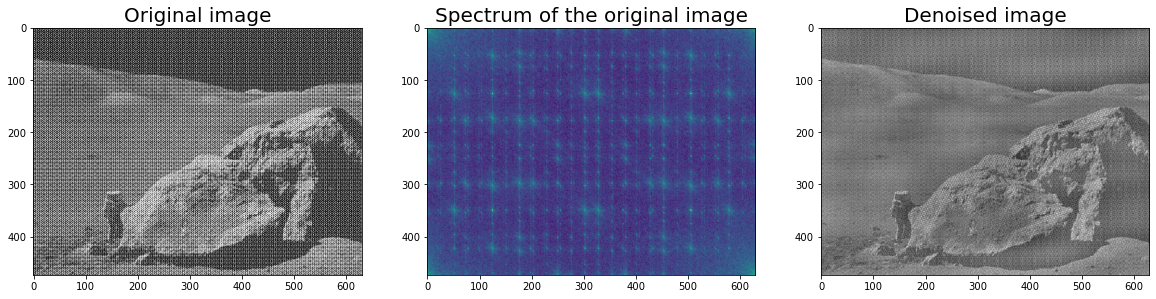

In [4]:
from matplotlib.colors import LogNorm
from scipy import fftpack

image = plt.imread("moonlanding.png")
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(image, plt.cm.gray)
ax[0].set_title("Original image", fontsize=20)

image_fft = fftpack.fft2(image)
spectrum = np.abs(image_fft)
im = ax[1].imshow(spectrum, norm=LogNorm(vmin=5))
ax[1].set_title("Spectrum of the original image", fontsize=20)

image_fft[spectrum > 2000] = 0

image2 = fftpack.ifft2(image_fft).real
ax[2].imshow(image2, plt.cm.gray)
ax[2].set_title("Denoised image", fontsize=20)

plt.show()

#The problem of this approach, that is very simple, consists in the fact that high frequencies are associated not
#only to noise but also to edges. This means that when they are removed, the image becomes somehow blurry, since
#edges are no more clear. Moreover, lower frequencies, that are preserved with this approach, 
#are associated to uniform regions. That's why shadows in the denoised image are not as visible as in the 
#original image.